In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AirQuality/AirQualityUCI.csv', sep =";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [6]:
print("Dữ liệu gốc:", df.shape)

Dữ liệu gốc: (9471, 17)


In [7]:
#xoá thuộc tính dữ liệu không cần thiết
df.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [8]:
#Định dạng cột từ string sáng float
df.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    df[i] = pd.to_numeric(df[i],errors='coerce') 

In [ ]:
#Thay thế dữ liệu rỗng
df.replace(to_replace=-200,value=np.nan,inplace=True)

df.info()

In [ ]:
#Định dạng Date and Time thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True) 

df['Time'] = pd.to_datetime(df['Time'],format= '%H.%M.%S' ).dt.time

df.head()

In [13]:
NMHC_ratio = df['NMHC(GT)'].isna().sum()/len(df['NMHC(GT)'])

print('The NMHC(GT) sensor has {:.2f}% of missing data.'.format(NMHC_ratio*100))

The NMHC(GT) sensor has 90.35% of missing data.


In [ ]:
df.drop('NMHC(GT)', axis=1, inplace=True) 

df.info()

In [ ]:
#kiểm tra có dữ liệu rỗng hay không
df.apply(lambda x: len(x.isnull()))

In [ ]:
df.isnull().sum()

In [ ]:
df1=df.dropna()
 # kiểm tra lại
df1.isnull().sum()

In [ ]:
df1.shape

In [ ]:
# Kiểm tra hàng trùng lặp với drop_duplicates
df1.drop_duplicates(inplace= True)

# Để kiểm tra có hàng trùng lặp hay không sử dụng hàm Assert 
assert df1.duplicated().sum() == 0

# Kiểm tra giá trị duy nhất trong Dataset
df1.apply(lambda x: len(x.unique()))

In [ ]:
df1.describe()

In [ ]:
df1.info()

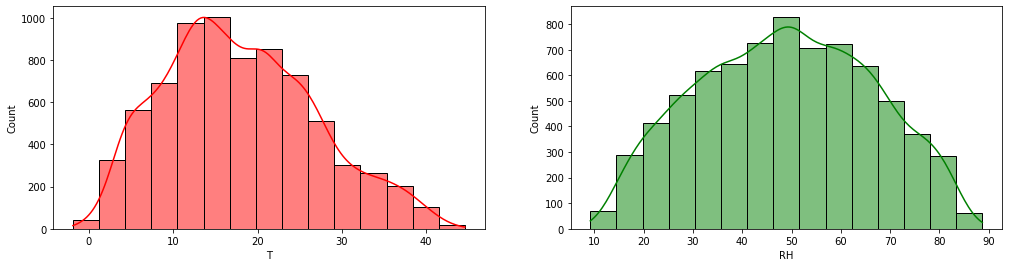

In [24]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df1["T"],stat="count",color="red",bins=15,kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(df1.RH,stat="count",color = "green",bins=15,kde={'alpha':0.5})
plt.show()

In [ ]:
#hiển thị mật độ của tất cả thuộc tính
for i in df1.columns[2:13]:
    plt.figure(figsize=(17,9))
    plt.subplot(2,2,1)
    sns.histplot(x=df1[i],stat="count",color="red",bins=15,kde={'alpha':0.5})

In [ ]:
#kiểm tra thống kê tất cả trong AirQuality
print("Average Ratio of (sensor)Tin oxide(nominally CO targeted) : {0: .2f}".format(df1['PT08.S1(CO)'].mean()))
print("Average Ratio of Benzene in microg/m^3 : {0: .2f}".format(df1['C6H6(GT)'].mean()))
print("Average Ratio of (sensor)Non-Methane Hydrocarbons : {0: .2f}".format(df1['PT08.S2(NMHC)'].mean()))
print("Average Ratio of Nitrogen Oxides in ppb : {0: .2f}".format(df1['NOx(GT)'].mean()))
print("Average Ratio of (sensor)Tungsten oxide(nominally NOx targeted) : {0: .2f}".format(df1['PT08.S3(NOx)'].mean()))
print("Average Ratio of true hourly averaged NO2(Nitrogen dioxide) : {0: .2f}".format(df1['NO2(GT)'].mean()))
print("Average Ratio of (sensor)tungsten oxide(nominally NO2 targeted) : {0: .2f}".format(df1['PT08.S4(NO2)'].mean()))
print("Average Ratio of (sensor)indium oxide(nominally O3 targeted) : {0: .2f}".format(df1['PT08.S5(O3)'].mean()))
print("Average temperature in Celsius: {0: .2f}".format(df1['T'].mean()))
print("Average Relative Humidity in % : {0: .2f}".format(df1['AH'].mean()))
print("Average Absolute Humidity : {0: .2f}".format(df1['RH'].mean()))

In [ ]:
#Loại bỏ dữ liệu cảm biến do rỗng nếu được so sánh với dữ liệu cảm biến khác

pd.options.mode.chained_assignment = None
df1.drop(['NOx(GT)','NO2(GT)'],axis=1, inplace=True)
df1.info()

In [ ]:
#Loại bỏ giá trị rỗng 

df1_filt = df1.dropna(how='any', axis=0)
df1_filt.reset_index(drop=True,inplace=True)
df1_filt.info()

In [30]:
#Thêm cột week days 

df1_filt['Week Day'] = df1_filt['Date'].dt.day_name() 

#Sắp xếp lại cột

cols = df1_filt.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:11]
df1_filt = df1_filt[cols]
df1_filt.head(10)

,Date,Week Day,Time,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,Wednesday,18:00:00,1360.0,11.9,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,Wednesday,19:00:00,1292.0,9.4,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,Wednesday,20:00:00,1402.0,9.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,Wednesday,21:00:00,1376.0,9.2,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,Wednesday,22:00:00,1272.0,6.5,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888
5,2004-03-10,Wednesday,23:00:00,1197.0,4.7,750.0,1337.0,1393.0,949.0,11.2,59.2,0.7848
6,2004-03-11,Thursday,00:00:00,1185.0,3.6,690.0,1462.0,1333.0,733.0,11.3,56.8,0.7603
7,2004-03-11,Thursday,01:00:00,1136.0,3.3,672.0,1453.0,1333.0,730.0,10.7,60.0,0.7702
8,2004-03-11,Thursday,02:00:00,1094.0,2.3,609.0,1579.0,1276.0,620.0,10.7,59.7,0.7648
9,2004-03-11,Thursday,04:00:00,1011.0,1.3,527.0,1818.0,1197.0,445.0,10.1,60.5,0.7465


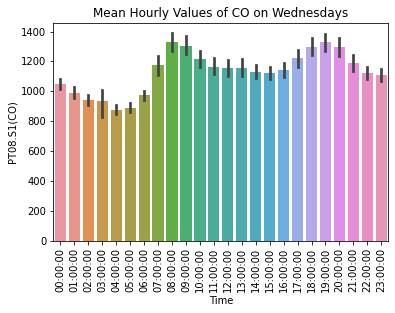

In [31]:
#Tạo dataframe với dữ liệu Wednesdays

df1_wed = df1_filt[df1_filt['Week Day'] == 'Wednesday']

#Biểu đồ giá trị CO vào Wednesdays

sns.barplot(x='Time',y='PT08.S1(CO)', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Wednesdays')
plt.xticks(rotation=90)
plt.show()


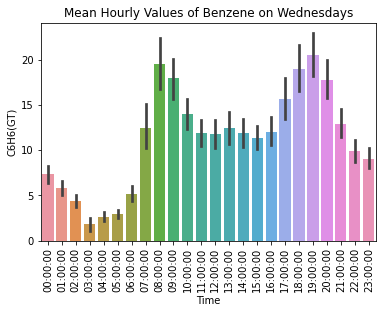

In [32]:
#Biểu đồ giá trị Benzene vào Wednesdays

sns.barplot(x='Time',y='C6H6(GT)', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of Benzene on Wednesdays')
plt.xticks(rotation=90)
plt.show()

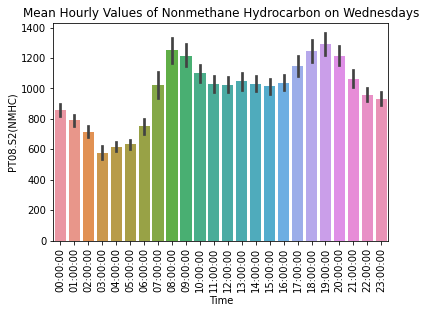

In [33]:
#Biểu đồ giá trị Nonmethane Hydrocarbon vào Wednesdays

sns.barplot(x='Time',y='PT08.S2(NMHC)', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of Nonmethane Hydrocarbon on Wednesdays')
plt.xticks(rotation=90)
plt.show()

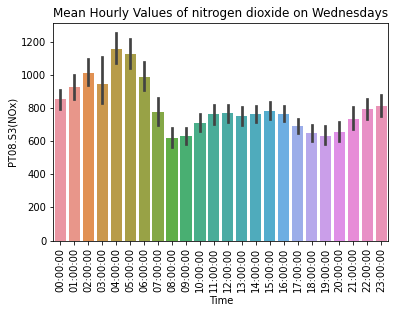

In [34]:
#Biểu đồ giá trị nitrogen dioxide vào Wednesdays

sns.barplot(x='Time',y='PT08.S3(NOx)', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of nitrogen dioxide on Wednesdays')
plt.xticks(rotation=90)
plt.show()

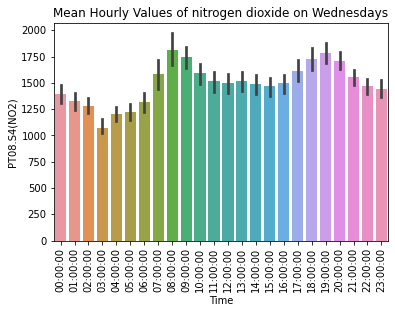

In [35]:
#Biểu đồ giá trị nitrogen dioxide vào Wednesdays

sns.barplot(x='Time',y='PT08.S4(NO2)', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of nitrogen dioxide on Wednesdays')
plt.xticks(rotation=90)
plt.show()


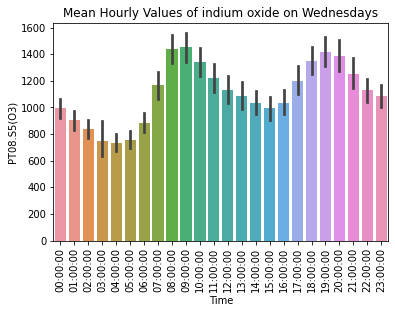

In [36]:
#Biểu đồ giá trị indium oxide on Wednesdays

sns.barplot(x='Time',y='PT08.S5(O3)', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of indium oxide on Wednesdays')
plt.xticks(rotation=90)
plt.show()

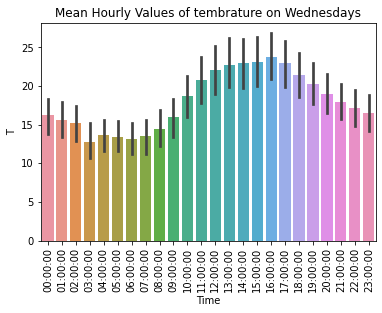

In [37]:
sns.barplot(x='Time',y='T', data=df1_wed.sort_values('Time'))
plt.title('Mean Hourly Values of tembrature on Wednesdays')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
sns.pairplot(df1)
plt.show()

**Decision Tree**

In [41]:
df1.columns

Index(['Date', 'Time', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [42]:
df1.drop(['Date','Time'], axis=1, inplace = True)

In [43]:
#Xử lý dữ liệu để vẽ cây quyết định
X_dt = df1.drop(['PT08.S1(CO)'], axis=1)  
Y = df1["PT08.S1(CO)"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=42, test_size=0.3)

In [58]:
print(X_train_dt.shape, X_test_dt.shape)

(5175, 8) (2218, 8)


In [44]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

In [ ]:
from sklearn.tree import DecisionTreeRegressor as clf
Y_name = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
clf = DecisionTreeRegressor(random_state=0,max_depth = 3)
clf.fit(X_train_dt, Y_train_dt)
Y_pred_dt = clf.predict(X_test_dt)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

Theo mô hình cây quyết định ta thấy PT08.S5(O3) là node gốc của cây

In [ ]:
#Visualize biểu đồ thể hiện các đặc tính quan trọng trong bộ dữ liệu AQ
features_list = X_dt.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_dt)))
res = cross_val_score(clf, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(clf.score(X_test_dt, Y_test_dt)*100, 2)))

**Decision Tree Regressor**

In [61]:
from sklearn.metrics import roc_auc_score , classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.feature_selection import *
from sklearn import metrics

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_dt, Y_train_dt)

y_train_pred = tree.predict(X_train_dt)
y_test_pred = tree.predict(X_test_dt)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train_dt, y_train_pred),
        mean_squared_error(Y_test_dt, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train_dt, y_train_pred),
        r2_score(Y_test_dt, y_test_pred)))

MSE train: 8861.355, test: 10010.364
R^2 train: 0.814, test: 0.790
